<a href="https://colab.research.google.com/github/oonya/image-processing/blob/master/area_division.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded_file = files.upload()

# !ls

Saving bear.jpg to bear.jpg


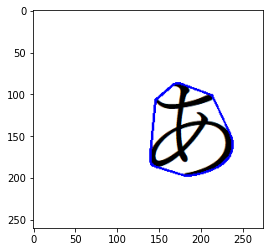

In [0]:
import numpy as np
import scipy.spatial as ssp
import cv2
from matplotlib import pyplot as plt


img = cv2.imread("a.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bgr_timg = img.copy()
# 二値化


# 凸包処理
def convexHull(img):
    bgr_timg = img.copy()

    # 二値化
    imgray = cv2.cvtColor(bgr_timg, cv2.COLOR_BGR2GRAY)
    imgray = cv2.bitwise_not(imgray)
    ret,thresh = cv2.threshold(imgray, 0, 255,
                cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    plt.gray()
    # thresh = ~thresh
    # plt.imshow(thresh)
    yl, xl = np.where(thresh == 255)

    # 座標データ形式に変換
    yl = yl.reshape((-1, 1))
    xl = xl.reshape((-1, 1))
    vec = np.hstack((xl, yl))

    # 凸包処理
    hull = cv2.convexHull(vec)

    # print(type(hull))
    # print(hull)

    # 結果描画
    result_img = cv2.drawContours(bgr_timg,[hull],
                0,(0,0,255),2)
    
    plt.imshow(result_img)
    
    
# plt.imshow(convexHull(img))
convexHull(img)
# print(convexHull(img))

# cv2.convexHull(thresh.reshape(-1, 1))
# convexHull(img)

In [0]:
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

print(points)
# print(hull)

[[0.3806796  0.81570563]
 [0.29687633 0.01197556]
 [0.67447879 0.58573867]
 [0.2000941  0.15329808]
 [0.31326374 0.36202914]
 [0.54907324 0.44336174]
 [0.08357318 0.78848385]
 [0.48950034 0.05385803]
 [0.06911779 0.52855489]
 [0.87948921 0.73071983]
 [0.70091928 0.57192826]
 [0.30588749 0.72651924]
 [0.3915734  0.6721708 ]
 [0.88106515 0.58149384]
 [0.13399864 0.01066161]
 [0.28631839 0.56461173]
 [0.78289935 0.7361347 ]
 [0.61366418 0.42231723]
 [0.19262203 0.40840268]
 [0.91960657 0.16297408]
 [0.86933356 0.57810748]
 [0.45717976 0.54389133]
 [0.50315672 0.63118275]
 [0.37182196 0.42755571]
 [0.9610565  0.66583062]
 [0.1412598  0.51798568]
 [0.49699721 0.86923418]
 [0.7338522  0.18845125]
 [0.55647826 0.18382889]
 [0.80126147 0.85418373]]


Drive already mounted at /colab; to attempt to forcibly remount, call drive.mount("/colab", force_remount=True).


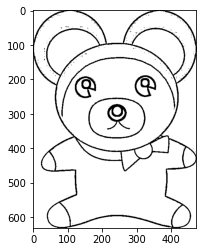

In [54]:
# 適応２値化

import cv2
import numpy as np
    
# 入力画像を読み込み
intput_img = cv2.imread("bear.jpg")
intput_img = cv2.cvtColor(intput_img, cv2.COLOR_BGR2RGB)

# kmeans
img = intput_img.reshape((-1, 3))
img = np.float32(img)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 15

ret, label, center = cv2.kmeans(img, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]

res2 = res.reshape(intput_img.shape)


# グレースケール変換
gray = cv2.cvtColor(res2, cv2.COLOR_RGB2GRAY)
    
# 方法2       
dst = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)


plt.gray()
plt.imshow(dst)

In [0]:
import numpy as np

a = np.arange(9).reshape((3, 3))

a = [
     [1, 1, 1],
     [1, 0, 0],
     [1, 1, 1]
]
a = np.array(a)

print(a)

yl, xl = np.where(a == 1)
print(xl, yl)

yl.reshape((-1, 1))
xl.reshape((-1, 1))
# vec = np.hstack((xl, yl))
vec = np.hstack((xl, yl))
# print(vec)

[[1 1 1]
 [1 0 0]
 [1 1 1]]
[0 1 2 0 0 1 2] [0 0 0 1 2 2 2]
